# Assignment A

Background and Aim

National Health Service (NHS)is health services including NHS England, Scotland, Wales and Northern Ireland. Each service provides a comprehensive range of health services, free at the point of use for people ordinarily resident in the United Kingdom (not including dental treatment and optical care). NHS publish Practice level prescribing data each month. The dataset contains list of all medicines, dressing and appliances which are prescribed by the practises in England and dispensed in the community. The NHS has been challenged to make ‘efficiency savings’, and we have been assigned to review the document and assess prescribing costs.

Datasets:
1.	NHS Digital GP Practice Prescribing 
2.	NHS Digital GP Practice Demographics

(Each monthly data set is very large (over 10 million rows), it may occur unexpected problems by open it directly)


Variables explanation: 

SHA/AT: this is code of the Strategic Health Authority (SHA) in which the practice resides (August 2010 to March 2013). From April 2013 this field relates to the Area Team.

PCT/CCG: this relates to the Clinical Commissioning Group (CCG)

Practice Code and names: This is code for the practice. It can potentially be used to linked to other data that uses the practice code as is defined by the NHS Digital Organisation Data Service (ODS). The format is Axxxxx where "A" is a letter and "xxxxx" is a 5-digit number.

BNF code: The BNF code for the drug.

BNF name: The drug is shown by individual preparation name, which may be proprietary or generic, followed by form and strength.

Items: This gives the number of items for this presentation that were dispensed in the specified month. A prescription item refers to a single supply of a medicine, dressing or appliance prescribed on a prescription form. If a prescription form includes three medicines, it is counted as three prescription items.

Net ingredient cost (NIC): This is the basic cost of a drug as used in primary care. This is the cost at list price excluding VAT, i.e. the price listed in the national Drug Tariff or in standard price lists and is not necessarily the price the NHS paid. It does not take into account of any contract prices or discounts, dispensing costs, fees or prescription charge income, so the amount the NHS paid will be different.

Actual Cost: From July 2012 onwards, the formula used to calculate 'Actual Cost' has been changed to include the new reimbursement payments which will be charged back to practices from dispensed prescriptions.

Quantity: The quantity of a drug dispensed is measured in units depending on the formulation of the product, which is given in the drug name. 

Processing date: The date is given as the year and month to which the file refers. 

Chemical name: This is the International Non-proprietary Name (INN) and is the standard registered name for the active constituent of that medicine, for example omeprazole.


In [1]:
# import necessary libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math

# Q1. Identify all GP practices located in London. For those practices, describe: 
o the total number of patients registered
o the total number of prescriptions
o the total actual cost of these prescriptions (using the ACT COST column)
o the top 10 most frequent drugs prescribed
o the bottom 10 less frequent drugs prescribed

We can see from the first Question is about all the GP practices located in London that is the premise.From the datasets, we need to extra all GPs in London first. We use NHS Digital GP Practice Demographics dataset to extract the GPs in London and combine with NHS Digital GP Practice Prescribing dataset via common key(practise code) to answer further questions. 

In [2]:
#Read NHS Digital GP Practice Prescribing dataset and add new columns name to the dataframe(lower case and remove space for further manipulating)

cols = ['sha', 'pct', 'practice', 'bnf_code', 'bnf_name', 'items', 'nic', 'act_cost', 'quantity', 'period']
PDPI = pd.read_csv('/Users/charles/Desktop/T201804PDPI+BNFT.CSV', header=None, names=cols, index_col=False, skiprows=1).rename(columns=lambda x: x.strip())
PDPI.head()


,sha,pct,practice,bnf_code,bnf_name,items,nic,act_cost,quantity,period
0,Q44,RTV,Y04937,0401010Z0AAAAAA,Zopiclone_Tab 7.5mg,6,1.56,2.12,63,201804
1,Q44,RTV,Y04937,0401020K0AAAHAH,Diazepam_Tab 2mg,4,0.87,1.15,73,201804
2,Q44,RTV,Y04937,0401020K0AAAIAI,Diazepam_Tab 5mg,2,0.46,0.56,35,201804
3,Q44,RTV,Y04937,0402010ABAAABAB,Quetiapine_Tab 25mg,1,2.60,2.52,14,201804
4,Q44,RTV,Y04937,0402010ADAAAAAA,Aripiprazole_Tab 10mg,1,1.53,1.53,14,201804


In [3]:
#Read NHS Digital GP Practice Demographics dataset and add new columns name to the dataframe(lower case and remove space for further manipulating)

cols2 = ['201804', 'practice', 'center_name01', 'center_name02', 'addr01', 'addr02', 'addr03', 'post_code']
ADDR = pd.read_csv('/Users/charles/Desktop/T201804ADDR+BNFT.CSV', header=None, names=cols2, index_col=False, skiprows=0).rename(columns=lambda x: x.strip())
ADDR.head()

,201804,practice,center_name01,center_name02,addr01,addr02,addr03,post_code
0,201804,A81001,THE DENSHAM SURGERY,THE HEALTH CENTRE,LAWSON STREET,STOCKTON-ON-TEES,CLEVELAND,TS18 1HU
1,201804,A81002,QUEENS PARK MEDICAL CENTRE,QUEENS PARK MEDICAL CTR,FARRER STREET,STOCKTON ON TEES,CLEVELAND,TS18 2AW
2,201804,A81004,BLUEBELL MEDICAL CENTRE,TRIMDON AVENUE,ACKLAM,MIDDLESBROUGH,,TS5 8SB
3,201804,A81005,SPRINGWOOD SURGERY,SPRINGWOOD SURGERY,RECTORY LANE,GUISBOROUGH,,TS14 7DJ
4,201804,A81006,TENNANT STREET MEDICAL PRACTICE,TENNANT ST MEDICAL PRACT,TENNANT STREET,STOCKTON-ON-TEES,CLEVELAND,TS18 2AT


In [4]:
# From the ADDR dataset, we can extra the GPs in London by either address or post_code. 
# We check the address(addr01:street addr02:city addr03:Province) to identify the GPs (practice code)in london. 

practice_London_addr = ADDR.practice[(ADDR.addr02.str.strip() == 'LONDON')|(ADDR.addr03.str.strip() == 'LONDON')]
practice_London_addr.values
practice_London_addr.count()

# London GPs ( slicing London GPs via the practise code from GP_demograph)

GP_demograph = pd.read_csv('/Users/charles/Desktop/gp-reg-pat-prac-all.csv')
GP_common_code = list(practice_London_addr.values)
GP_demograph_london = GP_demograph.loc[GP_demograph['CODE'].isin (GP_common_code)]
GP_demograph_london.head()

,PUBLICATION,EXTRACT_DATE,TYPE,CCG_CODE,ONS_CCG_CODE,CODE,POSTCODE,SEX,AGE,NUMBER_OF_PATIENTS
3664,GP_PRAC_PAT_LIST,01APR2018,GP,07L,E38000004,Y04786,IG3 8YB,ALL,ALL,443
3665,GP_PRAC_PAT_LIST,01APR2018,GP,07M,E38000005,E83003,N20 0DH,ALL,ALL,8911
3666,GP_PRAC_PAT_LIST,01APR2018,GP,07M,E38000005,E83005,N3 2JP,ALL,ALL,6224
3667,GP_PRAC_PAT_LIST,01APR2018,GP,07M,E38000005,E83006,NW2 1HS,ALL,ALL,6885
3668,GP_PRAC_PAT_LIST,01APR2018,GP,07M,E38000005,E83007,N3 2AU,ALL,ALL,5706


In [5]:
#Register patients number

GP_number = GP_demograph_london.NUMBER_OF_PATIENTS.sum()
GP_number

5841956

The total number of registered patients in London is 5841956.

In [6]:
#The total number of prescriptions

Prescriptions_london = PDPI.loc[PDPI['practice'].isin (GP_common_code)]
Prescriptions_london.quantity.sum()

510136987

The total number of prescriptions is 510136987.

In [7]:
#The total actual cost of these prescriptions (using the ACT COST column)

Prescriptions_COST_london = PDPI.loc[PDPI['practice'].isin (GP_common_code)]
Prescriptions_COST_london.act_cost.sum()

43322000.54

In [60]:
Prescriptions_sum_London=Prescriptions_london.groupby(['bnf_code']).sum()
# the top 10 most frequent drugs prescribed

Top_drug_sorted = Prescriptions_sum_London.sort_values('quantity',axis=0, ascending=False, kind='quicksort', na_position='last')
Top_drug_top10_London = Top_drug_sorted.head(10)
Top_drug_top10_London




,items,nic,act_cost,quantity,period
bnf_code,,,,,
090402000BBRRA0,4477,96281.92,91808.65,17023232,93838860
0601022B0AAABAB,121063,376329.40,353102.30,11706703,158819748
090402000BBAJA0,3655,58826.88,55067.39,10217184,62155632
0106040G0AAAAAA,17330,43081.00,40654.65,9283922,157205316
0407010H0AAAMAM,74463,75152.42,72891.70,7690436,158819748
130201000BBICBW,11641,81147.40,75401.83,6717500,155389080
090402000BBVTA0,1247,71311.05,66923.85,6565947,74062068
090402000BBRMA0,830,69577.20,65085.19,6556352,34912092
090402000BBSIA0,1166,63283.80,59344.98,5455500,55092492


In [61]:
# the bottom 10 drugs prescribed

Top_drug_sorted = Prescriptions_sum_London.sort_values('quantity',axis=0, ascending=True, kind='quicksort', na_position='last')
Top_drug_bottom10_London = Top_drug_sorted.head(10)
Top_drug_bottom10_London




,items,nic,act_cost,quantity,period
bnf_code,,,,,
0801030P0AAFIFI,1,13.37,12.41,0,201804
20100000737,1,1.40,1.31,1,201804
20031300053,1,51.97,48.21,1,201804
20031400045,1,17.70,16.43,1,201804
0402020ABBCABAG,1,734.70,681.37,1,201804
20031400062,1,59.43,55.13,1,201804
21011200274,1,21.28,19.75,1,201804
21270002383,1,40.19,37.28,1,201804
21270002421,1,162.24,150.46,1,201804


# Q2. Identify all GP practices located in Cambridge. For those practices, describe: 
o the total number of patients registered
o the total number of prescriptions
o the total actual cost of these prescriptions (using the ACT COST column)
o the top 10 most frequent drugs prescribed
o the bottom 10 less frequent drugs prescribed

We repeat the steps what we have done in Q1, except we select Cambridge instead of London.

In [10]:
#Extract Cambridge GP's Code and slice Cambridge GP from demograph dataset

practice_Cambridge_addr = ADDR.practice[(ADDR.addr02.str.strip() == 'CAMBRIDGE')|(ADDR.addr03.str.strip() == 'CAMBRIDGE')]
practice_Cambridge_addr.values
practice_Cambridge_addr.count()

#GP_common_code cambridge
GP_common_code2 = list(practice_Cambridge_addr.values)
#Cambridge GP
GP_demograph_Cambridge = GP_demograph.loc[GP_demograph['CODE'].isin (GP_common_code2)]
GP_demograph_Cambridge.head()

,PUBLICATION,EXTRACT_DATE,TYPE,CCG_CODE,ONS_CCG_CODE,CODE,POSTCODE,SEX,AGE,NUMBER_OF_PATIENTS
3050,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,D81001,CB2 1EH,ALL,ALL,12057
3051,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,D81002,CB3 0DB,ALL,ALL,16939
3052,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,D81003,CB1 2PY,ALL,ALL,9927
3054,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,D81005,CB3 9HS,ALL,ALL,14941
3057,GP_PRAC_PAT_LIST,01APR2018,GP,06H,E38000026,D81009,CB22 5FY,ALL,ALL,9071


In [11]:
#Register patients number

GP_number2 = GP_demograph_Cambridge.NUMBER_OF_PATIENTS.sum()
GP_number2

311579

The total number of registered patients in Cambridge is 311579.

In [12]:
#the total number of prescriptions

Prescriptions_Cambridge = PDPI.loc[PDPI['practice'].isin (GP_common_code2)]
Prescriptions_Cambridge.quantity.sum()

25232152

The total number of prescriptions of Cambridge is 25232152.

In [13]:
#the total actual cost of these prescriptions (using the ACT COST column)

Prescriptions_COST_Cambridge = PDPI.loc[PDPI['practice'].isin (GP_common_code2)]
Prescriptions_COST_Cambridge.act_cost.sum()

2434403.94

The total actual cost of these prescriptions of Cambridge is 2434403.94.

In [14]:
Prescriptions_Cambridge.quantity.sum()

25232152

In [57]:
Prescriptions_sum_Cambridge=Prescriptions_Cambridge.groupby(['bnf_code']).sum()
# the top 10 most frequent drugs prescribed

Top_drug_sorted2 = Prescriptions_sum_Cambridge.sort_values('quantity',axis=0, ascending=False, kind='quicksort', na_position='last')
Top_drug_top10 = Top_drug_sorted2.head(10)
Top_drug_top10

,items,nic,act_cost,quantity,period
bnf_code,,,,,
090402000BBSIA0,302,10725.65,10019.74,924625,5650512
090402000BBGYA0,27,9370.26,8690.25,651324,2421648
0407010H0AAAMAM,4565,6334.40,6012.26,573923,6457728
090402000BBAJA0,152,2859.36,2722.00,508936,4439688
130201000BBICBW,775,5405.80,5021.06,447500,6659532
0103050P0AAAAAA,11688,9533.34,9128.05,443650,6457728
090402000BBLMA0,23,7372.09,6837.07,437716,2623452
0106040G0AAAAAA,704,1953.93,1847.82,420220,6054120
0601022B0AAABAB,3620,10553.50,9866.12,328345,6255924


In [17]:
#########药名？？？

Top_drug_top10_list =list(Top_drug_top10.index)
Prescriptions_Cambridge.loc[Prescriptions_Cambridge.bnf_code.isin (Top_drug_top10_list)].sort_values('bnf_name',axis=0, ascending=False, kind='quicksort', na_position='last').head()



,sha,pct,practice,bnf_code,bnf_name,items,nic,act_cost,quantity,period
4245715,Q56,06H,D81042,0407010H0AAAMAM,Paracet_Tab 500mg,129,148.93,143.10,14142,201804
4244606,Q56,06H,D81041,0407010H0AAAMAM,Paracet_Tab 500mg,132,146.64,137.06,15120,201804
4265667,Q56,06H,D81056,0407010H0AAAMAM,Paracet_Tab 500mg,52,51.06,50.29,5266,201804
4190190,Q56,06H,D81005,0407010H0AAAMAM,Paracet_Tab 500mg,77,95.11,91.96,7362,201804
4262937,Q56,06H,D81054,0407010H0AAAMAM,Paracet_Tab 500mg,114,131.93,125.46,13604,201804


the top 10 most frequent drugs prescribed:

'Nutrison Pack_Energy                    ',
 'Fortisip Compact_Liq (8 Flav)           ',
 'Nutrison Pack_Energy                    ',
 'Paracet_Tab 500mg                       ',
 'Nutrison Pack_Energy M/Fibre            ',
 'Fortijuce_Liq (7 Flav)                  ',
 'Nutrison Pack_Conc Liq                  ',
 'Nutriprem 2_Liq                         ',
 'Fortisip Compact_Liq (8 Flav)           ',
 'Omeprazole_Cap E/C 20mg                 .

In [18]:
# the bottom 10 less frequent drugs prescribed

Bottom_drug_sorted2 = Prescriptions_sum_Cambridge.sort_values('quantity',axis=0, ascending=True, kind='quicksort', na_position='last')
Bottom_drug_top10 = Bottom_drug_sorted2.head(10)
Bottom_drug_top10

,items,nic,act_cost,quantity,period
bnf_code,,,,,
1308010Z0BBABAB,1,65.00,60.28,0,201804
21010230125,1,4.18,3.89,1,201804
23301083062,1,50.37,46.71,1,201804
21210000022,1,4.95,4.60,1,201804
23301083061,1,50.37,46.71,1,201804
23301083059,1,50.37,46.73,1,201804
23301023195,1,25.50,23.65,1,201804
23301023186,1,12.24,11.35,1,201804
23301023127,1,12.24,11.35,1,201804


The bottom 10 less frequent drugs prescribed:
    
 'Picato_Gel 500mcg/g                     ',
 'Ingenol Mebutate_Gel 150mcg/g           ',
 'Tubifast 2-Way Stch 5cm x 3m (Green) Stk',
 'Surg Suture W320 Ethilon Non-Absorb Ster',
 'LiquiBand Flow Control 0.5g Amp Skin Adh',
 'Zeroveen Crm 100g                       ',
 'Aquadrate Crm 10% 100g (App)            ',
 'Mandanol Sod Chlor 0.9% Nsl Dps         ',
 'Almus Sod Chlor 0.9% Nsl Dps            ',
 'Hydromol Bath & Shower Emollient 350ml .

# 3. Describe total number of prescriptions and their total actual cost (using the ACT COST column) across all practices for drugs related to:
o cardiovascular disease (British National Formulary chapter 2)
o antidepressants (British National Formulary chapter 4.3)

Cardiovascular disease (CVD) is a general term for conditions affecting the heart or blood vessels. And it is one of the main causes of deathh and disability in the UK, but it can be prevented by leading a healthy lifestyle. In our task, we Need to find the total number of prescriptions and total actual cost.

In [19]:
#Cardiovascular disease 
#In British National Formulary chapter 2, bnf_code is described as 02XXXXXXX
#We use regular expression to extra all the data related to CVD

cardi =PDPI[PDPI.bnf_code.str.contains('^02',regex=True)]
cardi.head()

,sha,pct,practice,bnf_code,bnf_name,items,nic,act_cost,quantity,period
28,Q44,RTV,Y05294,0204000R0AAAHAH,Propranolol HCl_Tab 10mg,4,7.12,6.65,224,201804
29,Q44,RTV,Y05294,0204000R0AAAJAJ,Propranolol HCl_Tab 40mg,3,1.35,1.59,42,201804
337,Q44,RXA,Y00327,0202020D0AAAEAE,Bumetanide_Tab 1mg,1,0.26,0.35,6,201804
338,Q44,RXA,Y00327,0202020L0AABBBB,Furosemide_Tab 20mg,1,0.13,0.23,10,201804
339,Q44,RXA,Y00327,0202020L0AABDBD,Furosemide_Tab 40mg,1,0.17,0.27,14,201804


In [20]:
#total number of prescription CVD
cardi.quantity.sum()

933262147

In [21]:
#total actual cost CVD
cardi.act_cost.sum()

90193834.01999994

Depression is a common mental health problem that causes people to experience low mood,loss pleasure and hopeless.It has been considered as one of the most common disease and continuesly increasing mortality under high-pressure daliy life.

Antidepressants are a type of medicine used to treat clinical depression. We can analyse the explicit and implicit information from the prescribtion of Antidepressants.

In [22]:
#Antidepressants
#In British National Formulary chapter 4.3, Antidepressants are described as 0403XXXXX
#We use regular expression to extra all the data related to Antidepressants

antide =PDPI[PDPI.bnf_code.str.contains('^0403',regex=True)]
antide.head()

,sha,pct,practice,bnf_code,bnf_name,items,nic,act_cost,quantity,period
9,Q44,RTV,Y04937,0403010X0AAAAAA,Trazodone HCl_Cap 50mg,1,1.19,1.22,14,201804
10,Q44,RTV,Y04937,0403030D0AAAAAA,Citalopram Hydrob_Tab 20mg,1,1.17,1.20,14,201804
11,Q44,RTV,Y04937,0403030D0AAABAB,Citalopram Hydrob_Tab 10mg,1,0.76,0.82,14,201804
12,Q44,RTV,Y04937,0403030P0AAAGAG,Paroxetine HCl_Oral Soln 10mg/5ml S/F,1,15.99,14.94,263,201804
13,Q44,RTV,Y04937,0403030P0AAAKAK,Paroxetine HCl_Tab 10mg,1,16.50,15.41,49,201804


In [23]:
#Total number of prescription 
antide.quantity.sum()

214223401

In [24]:
antide.act_cost.sum()

16853470.86

# 4. Describe the total spending and the relative costs per patient across all practices for the month of April 2018:

In [25]:
#visualize the monthly total spending per registered patients using a scatterplot and provide a trend line
#Calcualte total costs for eachh practice  

total_costs_practices =pd.DataFrame(PDPI.groupby(PDPI.practice).apply(lambda subf: subf['act_cost'].sum()))
total_costs_practices.columns = ['total_costs_per_practice']
# Reseting the index
total_costs_practices.reset_index(inplace=True)
total_costs_practices.head()


,practice,total_costs_per_practice
0,A81001,52194.63
1,A81002,268607.26
2,A81004,139115.40
3,A81005,102914.06
4,A81006,183226.79


In [26]:
gp_counts = pd.read_csv('/Users/charles/Desktop/gp-reg-pat-prac-all.csv').rename(columns=lambda x: x.strip())
gp_counts.head()

,PUBLICATION,EXTRACT_DATE,TYPE,CCG_CODE,ONS_CCG_CODE,CODE,POSTCODE,SEX,AGE,NUMBER_OF_PATIENTS
0,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83005,DL1 3RT,ALL,ALL,11826
1,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83006,DL3 6HZ,ALL,ALL,8044
2,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83010,DL3 9JP,ALL,ALL,14070
3,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83013,DL1 4YL,ALL,ALL,11298
4,GP_PRAC_PAT_LIST,01APR2018,GP,00C,E38000042,A83031,DL3 8SQ,ALL,ALL,10109


(0, 40000)

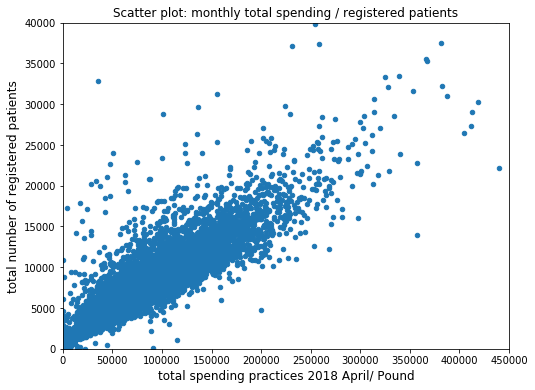

In [27]:
#Merge two datasets by common key(practice and CODE)
#visualization by scatterplot, x-axis is total_cost_per_GP, 
#y-axis is total number of registered patients_per_GP

merged = pd.merge(total_costs_practices, gp_counts[['CODE', 'NUMBER_OF_PATIENTS']], left_on='practice' , right_on='CODE')
ax3=merged.plot(kind='scatter', x='total_costs_per_practice', y='NUMBER_OF_PATIENTS', title='Scatter plot: monthly total spending / registered patients', figsize=(8,6))
ax3.set_xlabel("total spending practices 2018 April/ Pound",fontsize=12)
ax3.set_ylabel("total number of registered patients",fontsize=12)
ax3.set_xlim(0, 450000)
ax3.set_ylim(0, 40000)

(0, 72227)

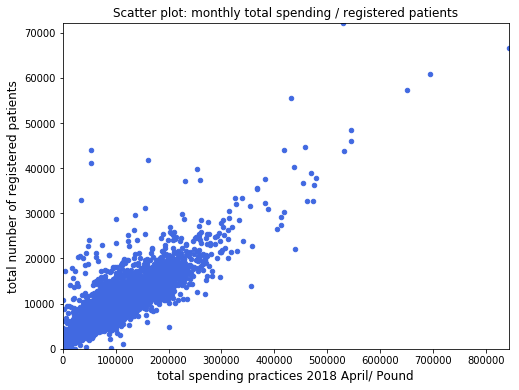

In [28]:
#Redraw the previous scatterplot and modify the max-value of x and y-axis¶

from math import floor
max_x = floor(merged.total_costs_per_practice.max())
max_y = floor(merged.NUMBER_OF_PATIENTS.max())

ax4=merged.plot(kind='scatter', x='total_costs_per_practice', y='NUMBER_OF_PATIENTS', title='Scatter plot: monthly total spending / registered patients', 
                color='royalblue', figsize=(8,6))
ax4.set_xlabel("total spending practices 2018 April/ Pound",fontsize=12)
ax4.set_ylabel("total number of registered patients",fontsize=12)
ax4.set_xlim(0, max_x)
ax4.set_ylim(0, max_y)




From the figure above, we can assume there is an linear correlation between total number of registered patients and monlthly total spending per practise. we will use python to simulate and validate the linear regression, calculate linear equation.

(0, 72227)

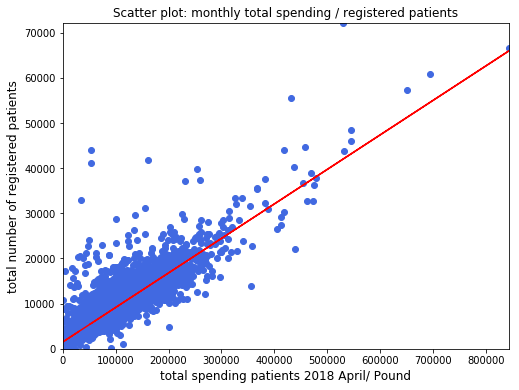

In [29]:
#Scatterplot with correlation
#plot those data points
#fig, ax = plt.subplots()

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(8, 6))
ax=fig.add_subplot(111)
x= merged['total_costs_per_practice']
y = merged['NUMBER_OF_PATIENTS']
ax.scatter(x, y, color='royalblue')
fit = np.polyfit(x, y, deg=1)
ax.plot(x, fit[0] * x + fit[1], color='red')
ax.set_title('Scatter plot: monthly total spending / registered patients')
ax.set_xlabel("total spending patients 2018 April/ Pound",fontsize=12)
ax.set_ylabel("total number of registered patients",fontsize=12)
max_x = floor(merged.total_costs_per_practice.max())
max_y = floor(merged.NUMBER_OF_PATIENTS.max())
ax.set_xlim(0, max_x)
ax.set_ylim(0, max_y)

From the simulation, we get the linear equation y = 0.077*x +1485.56  (x:total spending practises April/pound,y: total number of registered patients). So from the equation, we can predict how many patients can a GP prescribe within a certain budget. Moreover, we can generate a histogram for relative spending for all practices and fit in Gaussian curve to identify the distribution of patients and monthly prescription spending per patient. 

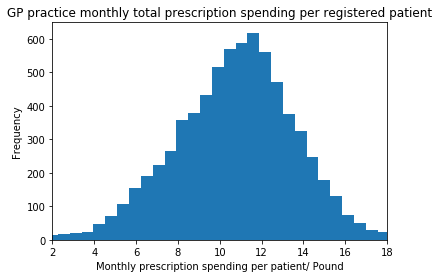

In [30]:
#generate a histogram for relative spending for all practices and fit a Gaussian(normal) curve

cost_patient_plot = merged
cost_patient_plot['cost_per_patient'] = cost_patient_plot['total_costs_per_practice'] / cost_patient_plot['NUMBER_OF_PATIENTS'] 

x = cost_patient_plot.cost_per_patient.values

plt.hist(x, bins=5000)
plt.xlabel("Monthly prescription spending per patient/ Pound")
plt.ylabel("Frequency")

min_x = floor(cost_patient_plot['cost_per_patient'].quantile(.01))
max_x = floor(cost_patient_plot['cost_per_patient'].quantile(.99))
plt.xlim(min_x, max_x) #do not show outliers
plt.title("GP practice monthly total prescription spending per registered patient")
plt.show()

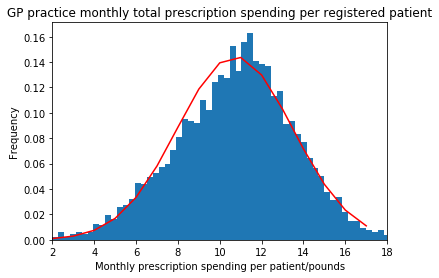

In [31]:
from scipy.stats import norm


cost_patient_plot = merged
cost_patient_plot['cost_per_patient'] = cost_patient_plot['total_costs_per_practice'] / cost_patient_plot['NUMBER_OF_PATIENTS'] 

x = cost_patient_plot.cost_per_patient.values

min_x = floor(cost_patient_plot['cost_per_patient'].quantile(.01))
max_x = floor(cost_patient_plot['cost_per_patient'].quantile(.99))
x2 =  cost_patient_plot[(x > min_x)&(x<max_x)]['cost_per_patient'] #some data are outlier, limit the data between min_x and max_x
rangea = np.arange(min_x,max_x,1)

plt.hist(x, bins=10000,normed = True)
plt.plot(rangea,norm.pdf(rangea,np.mean(x2),np.std(x2)),color = 'r') #fit in normal curve, mean,standard deviation

plt.xlabel("Monthly prescription spending per patient/pounds")
plt.ylabel("Frequency")

plt.xlim(min_x, max_x) #do not show outliers
plt.title("GP practice monthly total prescription spending per registered patient")
plt.show()


From the figure above, we can see that the data mainly obey Gaussain distribution (mean is 10.73,std is 2.76) although slightly skewed. 95% of the patients are in distribution of spending 5.5 to 16.5 pounds per month (-2std to 2std), patients are more likely paying 8-14 pounds per month generally.

# Assignment B

Background and Aim

The WHO Mortality Database is a database of registered deaths compiled by WHO from data given by national authorities around the world. The cause of each death is classified by the circumstances that led to death. The database contains number of deaths by country, year, sex, age group and cause of death as far back from 1950. In the datasets, we use ICD-10 code for recording the cause of death.
Each country in the database is uniquely identified all WHO datasets by a four digit numeric code. The mapping between countries and identifier codes is located in the "Country codes" lookup file. Information on the population of each country is found in the "Population and live births" file.

Datasets:
1.	Morticd10_part1.csv
2.	Morticd10_part2.csv

Necessary Variables Explanation:
Country : Country code 
Year    : Year to which data refer
Cause   : Cause of death 
Deaths1 : Deaths at all ages
Deaths2 : Deaths at age 0 year
Deaths3 : Deaths at age 1 year
...
Deaths8 : Deaths at age 10-14 year
...
Deaths24: Deaths at age 90-95 year
Deaths25: Deaths at age 95 and above
Deaths26: unspecified


3.  pop.csv

Necessary Variables Explanation:
Country : Country code
Year    : Year to which data refer
Pop1    : Population at all ages
Pop2    : Population at 0 years
...
Pop7    :Population at age 5-9 years
...
Pop24   :Population at age 90-94 years
Pop25   :Population at age 95 years and over
Pop26   :unspecified


# Question1 What was the population and the total number of deaths (from all causes, all ages) in 2010 for:

o Iceland

o Italy

o New Zealand

In [32]:
#First of all, Merge Morticd10_part1 and Morticd10_part2 into one dataset 'new_files'

file1 = pd.read_csv('Morticd10_part1.csv')
file2 = pd.read_csv('Morticd10_part2.csv')
frames = [file1,file2]
new_files = pd.concat(frames)
new_files.head()

/Users/charles/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/charles/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
0,1400,NaN,NaN,2001,101,1000,1,7,8,332,...,95.0,NaN,NaN,NaN,NaN,0.0,8.0,NaN,NaN,NaN
1,1400,NaN,NaN,2001,101,1000,2,7,8,222,...,112.0,NaN,NaN,NaN,NaN,0.0,11.0,NaN,NaN,NaN
2,1400,NaN,NaN,2001,101,1001,1,7,8,24,...,5.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
3,1400,NaN,NaN,2001,101,1001,2,7,8,14,...,6.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN
4,1400,NaN,NaN,2001,101,1002,1,7,8,0,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN


# Mortality
The first question aims to know the total deaths(from all causes,all ages)and population in 2010 for Iceland, Italy and New Zealand. We will extract total number of death and population from two relevant datasets. From the documentation, we find the country codes for Iceland,Italy and New Zealand are 4160,4180 and 5150.

In [33]:
#oIceland 4160       o New Zealand 5150
#Total number of deaths Iceland (all cause,all age in 2010) 

Total_deaths_Iceland = new_files.loc[(new_files['Country']==4160) & (new_files['Year']==2010)]
Total_deaths_Iceland.Deaths1.sum()

4038

The total number of deaths Iceland in 2010 is 4038.

In [34]:
#oItaly 4180
#Total number of deaths Italy (all cause,all age in 2010)

Total_deaths_Italy = new_files.loc[(new_files['Country']==4180) & (new_files['Year']==2010)]
Total_deaths_Italy.Deaths1.sum()

1169230

In [35]:
#oItaly 5150
#Total number of deaths New Zealand (all cause,all age in 2010)

Total_deaths_Newzealand = new_files.loc[(new_files['Country']==5150) & (new_files['Year']==2010)]
Total_deaths_Newzealand.Deaths1.sum()

57298

# Population

In [36]:
#read population csv
pop = pd.read_csv('pop.csv')
pop.head()

,Country,Admin1,SubDiv,Year,Sex,Frmat,Pop1,Pop2,Pop3,Pop4,...,Pop18,Pop19,Pop20,Pop21,Pop22,Pop23,Pop24,Pop25,Pop26,Lb
0,1060,NaN,NaN,1980,1,7,137100.0,3400.0,15800.0,NaN,...,NaN,5300.0,NaN,2900.0,NaN,NaN,NaN,NaN,6500.0,5000.0
1,1060,NaN,NaN,1980,2,7,159000.0,4000.0,18400.0,NaN,...,NaN,6200.0,NaN,3400.0,NaN,NaN,NaN,NaN,7500.0,6000.0
2,1125,NaN,NaN,1955,1,2,5051500.0,150300.0,543400.0,NaN,...,110200.0,51100.0,41600.0,14300.0,11800.0,25300.0,NaN,NaN,0.0,253329.0
3,1125,NaN,NaN,1955,2,2,5049400.0,145200.0,551000.0,NaN,...,122100.0,51100.0,50700.0,15800.0,18000.0,28500.0,NaN,NaN,0.0,237901.0
4,1125,NaN,NaN,1956,1,2,5353700.0,158700.0,576600.0,NaN,...,116900.0,54100.0,44000.0,14900.0,12400.0,26600.0,NaN,NaN,0.0,250022.0


In [37]:
# Pop1	Population at all ages
# oIceland 4160 

pop_Iceland =pop.loc[(pop['Country']==4160)&(pop['Year']==2010)].Pop1.sum()
pop_Iceland

318041.0

In [38]:
#oItaly 4180

pop_Italy =pop.loc[(pop['Country']==4180)&(pop['Year']==2010)].Pop1.sum()
pop_Italy

60483386.0

In [39]:
#o New Zealand 5150

pop_Newzealand =pop.loc[(pop['Country']==5150)&(pop['Year']==2010)].Pop1.sum()
pop_Newzealand

4367360.0

# 2. What was the distribution of deaths (all causes, all years) by age group in Italy?

o Visualise the results using a histogram. 

In the question2, in order to visualise the distribution of deaths by age group in Italy, we need to calculate total number of deaths according to different age groups.

In [40]:
#Total number of deaths Italy (all cause,all age)

Total_deaths_Italy = new_files.loc[(new_files['Country']==4180)]
Total_deaths_Italy.Deaths1.sum()

15280766

In [41]:
# rename age_group by real age groups and rebuild deaths dataframe according to age groups

age_group = ['Deaths2','Deaths3','Deaths4','Deaths5','Deaths6','Deaths7','Deaths8','Deaths9','Deaths10','Deaths11',
             'Deaths12','Deaths13','Deaths14','Deaths15','Deaths16','Deaths17','Deaths18','Deaths19','Deaths20','Deaths21',
             'Deaths22','Deaths23','Deaths24','Deaths25','Deaths26','IM_Deaths1','IM_Deaths2','IM_Deaths3','IM_Deaths4'
            ]
list1 = []
for i in age_group:
    list1.append(Total_deaths_Italy[i].sum())
    
Death_age = ['0','1','2','3','4','5-9','10-14','15-19','20-24','25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-64','65-69','70-74','75-79','80-84','85-89','90-94','95+','unspecified','0d','1-6d','7-27d','28-364d']
Italy_Death_age = zip(Death_age,list1)
data_dict = dict(Italy_Death_age)
Deaths = pd.DataFrame(list(data_dict.items()), columns=['all_age', 'Deaths'])
Deaths.head()



,all_age,Deaths
0,0,48752.0
1,1,3262.0
2,2,2168.0
3,3,1826.0
4,4,1628.0


Text(0,0.5,'Deaths')

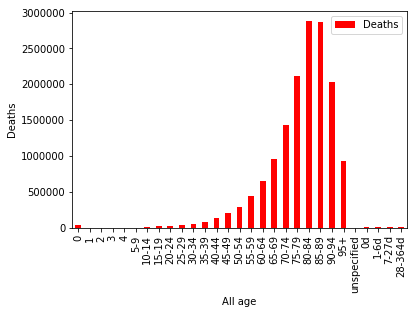

In [42]:
#Visualisation 

ax = Deaths[['all_age','Deaths']].plot(kind ='bar',x ='all_age',y='Deaths',color = 'red')

ax.set_xlabel("All age",fontsize=10)

ax.set_ylabel("Deaths",fontsize=10)

# 3. What were the top five causes of death (top five ICD-10 terms) in Italy across all years for the Neoplasm ICD10-category (C00-D48)?

o Generate a table with the cause of death, the number of deaths, and the proportion of overall deaths.

o Generate a pie chart to visualize the proportion of deaths.

In [43]:
Total_deaths_Italy = new_files.loc[(new_files['Country']==4180)]

codelist = (Total_deaths_Italy.Cause > 'C00')&(Total_deaths_Italy.Cause < 'D48')
new_causelist = Total_deaths_Italy[codelist].Cause.values
##CH02	C00-D48	NEOPLASMS
Italy_dneoplasms = Total_deaths_Italy.loc[Total_deaths_Italy.Cause.isin(new_causelist)]
Italy_dneoplasms_groupby =Italy_dneoplasms.groupby('Cause').sum()

# Generate a table with the cause of death, the number of deaths, and the proportion of overall deaths.

Italy_dneoplasms_Deaths =pd.DataFrame(Italy_dneoplasms_groupby['Deaths1'])
Italy_dneoplasms_SortedDeaths =Italy_dneoplasms_Deaths.sort_values('Deaths1', axis=0, ascending=False, kind='quicksort', na_position='last')
Italy_dneoplasms_SortedDeaths.head()
Italy_dneoplasms_SortedDeaths['Proportion'] =  Italy_dneoplasms_SortedDeaths['Deaths1'] / Italy_dneoplasms_SortedDeaths['Deaths1'].sum()
Italy_dneoplasms_SortedDeaths.head()



,Deaths1,Proportion
Cause,,
C349,426451,0.190419
C509,155895,0.069610
C189,143188,0.063936
C169,125679,0.056118
C259,120070,0.053614


/Users/charles/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


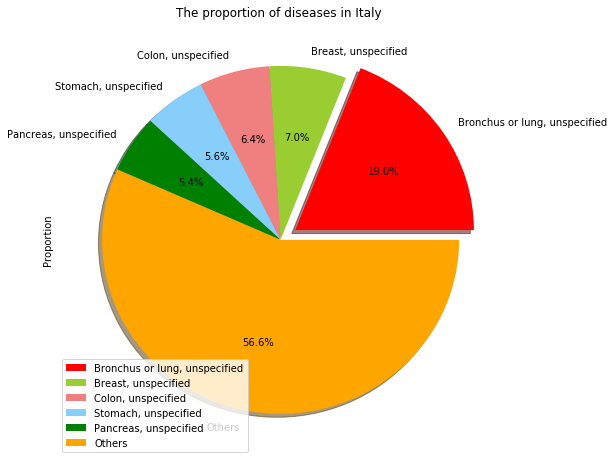

In [44]:
# Visualise top five diseases
new_Italy_dneoplasms_SortedDeaths = Italy_dneoplasms_SortedDeaths[:5]

#separate top five diseases and other diseases
other_proportion =1-new_Italy_dneoplasms_SortedDeaths.Proportion.sum()
new_Italy_dneoplasms_SortedDeaths.loc['others'] = other_proportion

# Generate a pie chart to visualize the proportion of deaths.

labels = 'Bronchus or lung, unspecified', 'Breast, unspecified', 'Colon, unspecified', 'Stomach, unspecified','Pancreas, unspecified','Others'
explode = (0.1, 0, 0, 0, 0 ,0)
colors = ['red', 'yellowgreen', 'lightcoral', 'lightskyblue','green','orange']

titles="The proportion of diseases in Italy "
plot = new_Italy_dneoplasms_SortedDeaths.plot.pie(y='Proportion',explode=explode, figsize=(8, 8),labels =labels,shadow = True,colors=colors, autopct='%1.1f%%',title = titles)



# 4. Are there differences by age group for deaths from Neoplasms (C00-D48) in Australia for 2010?

In [45]:
#Total number of deaths from Neoplasms Australia for 2010
Total_deaths_Australia = new_files.loc[(new_files['Country']==5020)&(new_files['Year']==2010)]
Australia_dneoplasms = Total_deaths_Australia.loc[Total_deaths_Australia.Cause.isin(new_causelist)]
Australia_dneoplasms.head()

,Country,Admin1,SubDiv,Year,List,Cause,Sex,Frmat,IM_Frmat,Deaths1,...,Deaths21,Deaths22,Deaths23,Deaths24,Deaths25,Deaths26,IM_Deaths1,IM_Deaths2,IM_Deaths3,IM_Deaths4
2144494,5020,NaN,NaN,2010,104,C001,1,0,1,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2144495,5020,NaN,NaN,2010,104,C001,2,0,1,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2144496,5020,NaN,NaN,2010,104,C009,1,0,1,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2144497,5020,NaN,NaN,2010,104,C009,2,0,1,5,...,2.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2144498,5020,NaN,NaN,2010,104,C01,1,0,1,20,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
list3 = []
for i in age_group:
    list3.append(Australia_dneoplasms[i].sum())
    
Australia_dneoplasms_Death_age = zip(Death_age,list3)
data_dict2 = dict(Australia_dneoplasms_Death_age)

Dneoplasms_Deaths_Australia = pd.DataFrame(list(data_dict2.items()), columns=['all_age', 'Deaths'])

Sorted_Dneoplasms_Deaths_Australia = Dneoplasms_Deaths_Australia.sort_values('Deaths',axis=0, ascending=False, kind='quicksort', na_position='last')
Sorted_Dneoplasms_Deaths_Australia.all_age.head(5)

20    80-84
19    75-79
18    70-74
21    85-89
17    65-69
Name: all_age, dtype: object

# 5. Compare and contrast the frequency of deaths by Neoplasms in Italy and Australia in 2010.

In [47]:
# Combine information on the population and deaths and describe your logic. 
#total population of Italy 
pop_Italy_2010 =pop.loc[(pop['Country']==4180)&(pop['Year']==2010)].Pop1.sum()
pop_Italy_2010

60483386.0

In [48]:
pop_Australia_2010 =pop.loc[(pop['Country']==5020)&(pop['Year']==2010)].Pop1.sum()
pop_Australia_2010

22297515.0

In [49]:
#Total number of deaths from Neoplasms Italy for 2010

Total_deaths_Italy = new_files.loc[(new_files['Country']==4180)&(new_files['Year']==2010)]
Italy_dneoplasms = Total_deaths_Italy.loc[Total_deaths_Italy.Cause.isin(new_causelist)]
Italy_dneoplasms_groupby = Italy_dneoplasms.groupby('Cause').sum()
Italy_dneoplasms = pd.DataFrame(Italy_dneoplasms_groupby.Deaths1)
Italy_dneoplasms['It_frequency_per1000000'] = Italy_dneoplasms.Deaths1*100000/pop_Italy_2010
Italy_dneoplasms.columns=['It_Deaths', 'It_frequency_per100000']
Italy_dneoplasms.head()

,It_Deaths,It_frequency_per100000
Cause,,
C000,7,0.011573
C001,27,0.044640
C006,1,0.001653
C009,31,0.051254
C01,95,0.157068


In [50]:
#Total number of deaths from Neoplasms Australia for 2010

Total_deaths_Australia = new_files.loc[(new_files['Country']==5020)&(new_files['Year']==2010)]
Australia_dneoplasms = Total_deaths_Australia.loc[Total_deaths_Australia.Cause.isin(new_causelist)]
Australia_dneoplasms_groupby = Australia_dneoplasms.groupby('Cause').sum()
Australia_dneoplasms = pd.DataFrame(Australia_dneoplasms_groupby.Deaths1)
Australia_dneoplasms['Au_frequency_per100000'] = Australia_dneoplasms.Deaths1*100000/pop_Australia_2010
Australia_dneoplasms.columns=['Au_Deaths', 'Au_frequency_per100000']
Australia_dneoplasms.head()

,Au_Deaths,Au_frequency_per100000
Cause,,
C001,4,0.017939
C009,7,0.031394
C01,27,0.121090
C020,1,0.004485
C028,2,0.008970


In [51]:
Australia_dneoplasms['Au_Deaths'].sum()

43275

In [52]:

Deaths_compare =Italy_dneoplasms.join(Australia_dneoplasms,how = 'outer')
Deaths_compare.head()

,It_Deaths,It_frequency_per100000,Au_Deaths,Au_frequency_per100000
Cause,,,,
C000,7.0,0.011573,NaN,NaN
C001,27.0,0.044640,4.0,0.017939
C006,1.0,0.001653,NaN,NaN
C009,31.0,0.051254,7.0,0.031394
C01,95.0,0.157068,27.0,0.121090


In [53]:
Au_Sorted_death_compare = Deaths_compare.sort_values('Au_frequency_per100000',ascending=False)
Au_Sorted_death_compare_Top5 =Au_Sorted_death_compare[:5]
Au_Sorted_death_compare_Top5

,It_Deaths,It_frequency_per100000,Au_Deaths,Au_frequency_per100000
Cause,,,,
C349,33416.0,55.248230,7989.0,35.829105
C61,7509.0,12.414980,3236.0,14.512828
C509,12231.0,20.222082,2865.0,12.848965
C809,8036.0,13.286293,2783.0,12.481211
C259,9683.0,16.009355,2367.0,10.615533


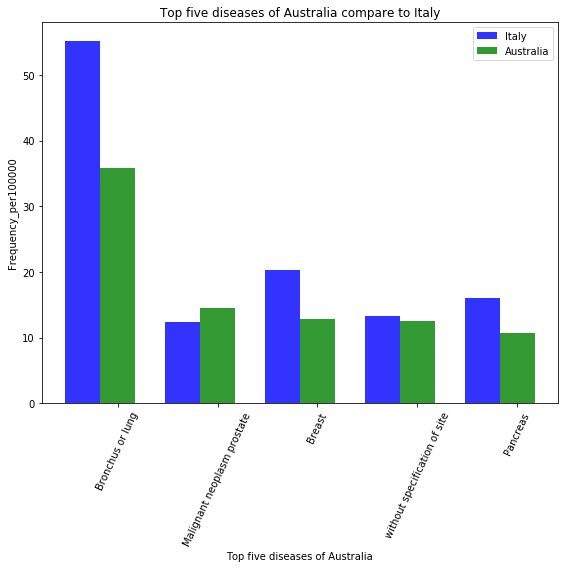

In [54]:
#Compare top five Neoplasms of Australia deaths frequency per 10000 with Italy

Au_Top5 = Au_Sorted_death_compare_Top5.Au_frequency_per100000
Au_au_Top5 =list(Au_Top5.values)
It_Top5 = Au_Sorted_death_compare_Top5.It_frequency_per100000
It_au_top5 =list(It_Top5.values)

# data to plot
n_groups = 5

# create plot
fig, ax = plt.subplots(figsize =(8,8))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, It_au_top5, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Italy')
 
rects2 = plt.bar(index + bar_width, Au_au_Top5, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Australia')
 
plt.xlabel('Top five diseases of Australia')
plt.ylabel('Frequency_per100000')
plt.title('Top five diseases of Australia compare to Italy')
plt.xticks(index + bar_width, ('Bronchus or lung', 'Malignant neoplasm prostate', 'Breast', 'without specification of site','Pancreas'),rotation=65)
plt.legend()
plt.tight_layout()
plt.show()

In [55]:
#Compare top five Neoplasms of Italy deaths frequency per 10000 with Australia

It_Sorted_death_compare = Deaths_compare.sort_values('It_frequency_per100000',ascending=False)
It_Sorted_death_compare_Top5 =It_Sorted_death_compare[:5]
It_Sorted_death_compare_Top5

,It_Deaths,It_frequency_per100000,Au_Deaths,Au_frequency_per100000
Cause,,,,
C349,33416.0,55.248230,7989.0,35.829105
C509,12231.0,20.222082,2865.0,12.848965
C189,11638.0,19.241648,1738.0,7.794591
C259,9683.0,16.009355,2367.0,10.615533
C169,9523.0,15.744820,1004.0,4.502744


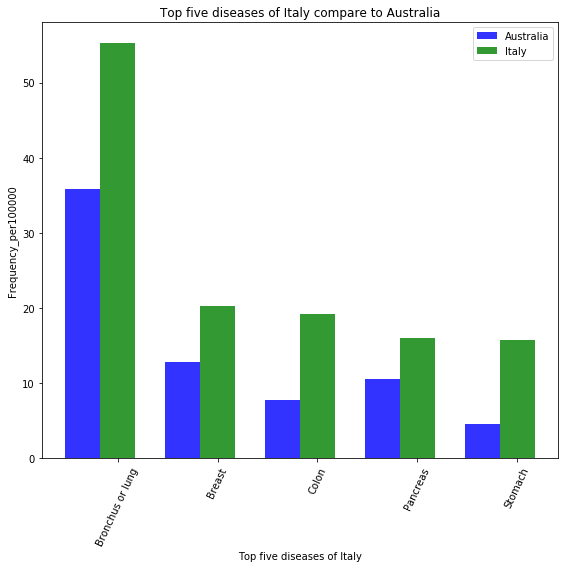

In [56]:
#Compare top five Neoplasms of Italy deaths frequency per 10000 with Australia

Au_Top5 = It_Sorted_death_compare_Top5.Au_frequency_per100000
Au_it_Top5 =list(Au_Top5.values)
It_Top5 = It_Sorted_death_compare_Top5.It_frequency_per100000
It_it_Top5 =list(It_Top5.values)

# data to plot
n_groups = 5

# create plot
fig, ax = plt.subplots(figsize =(8,8))
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, Au_it_Top5, bar_width,
                 alpha=opacity,
                 color='b',
                 label='Australia')
 
rects2 = plt.bar(index + bar_width, It_it_Top5, bar_width,
                 alpha=opacity,
                 color='g',
                 label='Italy')
 
plt.xlabel('Top five diseases of Italy')
plt.ylabel('Frequency_per100000')
plt.title('Top five diseases of Italy compare to Australia')
plt.xticks(index + bar_width, ('Bronchus or lung', 'Breast', 'Colon', 'Pancreas','Stomach'),rotation=65)
plt.legend()
plt.tight_layout()
plt.show()